# Q1 Supervised Learning

##### Here, you are going to use the features you generated in Assignment #3 to predict the clients response to a promotion campaign. This is a typical classification problem in the retail industry, but the formulation of the problem is similar to industries such as fraud detection, marketing and manufacturing.
##### The clients responses are stored in the Retail Data Response.csv file from Kaggle. The responses are binary: 0 for clients who responded negatively to the promotional campaign and 1 for clients who responded positively to the campaign.
##### You will explore solving the classification problem with two different sets of features (i.e.annual and monthly) and three different algorithms as shown in the image below.

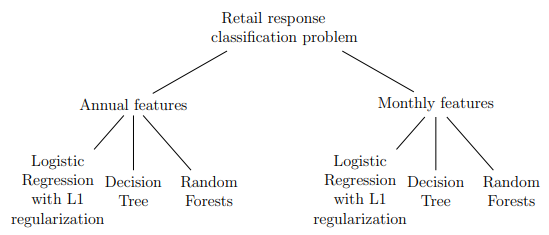

In [1]:
# Import Libraries and relevent settings
import pandas as pd
import numpy as np
import seaborn as sns
import imputena as imp
import missingno as mno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from adjustText import adjust_text
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import product

matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 10})

# from bokeh.models import ColumnDataSource, LabelSet, Arrow, NormalHead, OpenHead, VeeHead, ColorBar
# from bokeh.plotting import figure, output_file, show
# from bokeh.transform import linear_cmap
# from bokeh.palettes import RdBu

In [2]:
Retail_Data_Response = pd.read_csv('Retail_Data_Response.csv')

In [3]:
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')

In [4]:
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')

In [5]:
days_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')

In [6]:
mth_rolling_features = mth_rolling_features.drop(columns = 'Unnamed: 0')
mth_day_counts = mth_day_counts.drop(columns = 'Unnamed: 0')
days_since_last_txn = days_since_last_txn.drop(columns = 'Unnamed: 0')

## 1.1 Import the monthly and annual data and join

##### In Assignment #3, you created five different feature families that capture annual and monthly aggregations. Here, you will model the retail problem with two approaches: using annual and monthly features. Therefore, you need to create the joined tables based on the following logic:

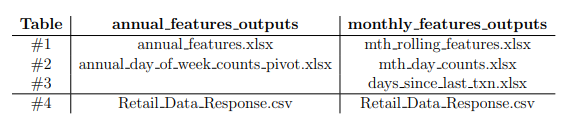

##### In both the annual and monthly features approach, you need to join at the end with table #4, the clients responses. This is simply a table that contains the binary response of the client to our marketing effort as described above and that is the output or label or target that makes this a supervised learning problem.


In [7]:
mth_rolling_features

,customer_id,ME DT,mth_txn_amt_sum,mth_txn_amt_count,amt sum 3M,amt mean 3M,amt max 3M,txn cnt sum 3M,txn cnt mean 3M,txn cnt max 3M,...,amt max 6M,txn cnt sum 6M,txn cnt mean 6M,txn cnt max 6M,amt sum 9M,amt mean 9M,amt max 9M,txn cnt sum 9M,txn cnt mean 9M,txn cnt max 9M
0,CS1112,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,81.0,9.000000,35.0,3.0,0.333333,1.0
323779,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,81.0,9.000000,35.0,3.0,0.333333,1.0
323780,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,9.000000,35.0,3.0,0.333333,1.0
323781,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,95.0,10.555556,35.0,3.0,0.333333,1.0


In [8]:
mth_day_counts

,customer_id,ME DT,ann_day_of_week_count_Friday,ann_day_of_week_count_Monday,ann_day_of_week_count_Saturday,ann_day_of_week_count_Sunday,ann_day_of_week_count_Thursday,ann_day_of_week_count_Tuesday,ann_day_of_week_count_Wednesday
0,CS5295,2013-02-28,0,1,0,0,0,0,0
1,CS5295,2015-03-31,0,0,0,0,0,0,0
2,CS5295,2011-11-30,0,1,0,0,0,0,1
3,CS5295,2013-11-30,0,0,0,0,0,0,0
4,CS5295,2014-03-31,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
323778,CS8077,2011-08-31,0,0,0,1,0,0,0
323779,CS8077,2012-09-30,0,0,0,0,0,0,0
323780,CS8077,2014-09-30,0,0,0,0,0,0,0
323781,CS8077,2014-02-28,0,0,0,0,0,0,0


In [9]:
days_since_last_txn

,customer_id,ME DT,days_since_last_txn
0,CS1112,2011-05-31,-1
1,CS1112,2011-06-30,15
2,CS1112,2011-07-31,46
3,CS1112,2011-08-31,12
4,CS1112,2011-09-30,42
...,...,...,...
323778,CS9000,2014-11-30,98
323779,CS9000,2014-12-31,129
323780,CS9000,2015-01-31,160
323781,CS9000,2015-02-28,0


In [10]:
Retail_Data_Response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [11]:
a = mth_rolling_features.merge(mth_day_counts, left_on = ['customer_id', 'ME DT'], right_on = ['customer_id', 'ME DT'])
b = a.merge(days_since_last_txn, left_on = ['customer_id', 'ME DT'], right_on = ['customer_id', 'ME DT'])
monthly_features_outputs = b.merge(Retail_Data_Response, how = 'right', left_on = 'customer_id', right_on = 'customer_id')
monthly_features_outputs = monthly_features_outputs.set_index(['customer_id','ME DT'])
monthly_features_outputs

mth_txn_amt_sum  mth_txn_amt_count  amt sum 3M  \
customer_id ME DT                                                        
CS1112      2011-05-31                0                  0         NaN   
            2011-06-30               56                  1         NaN   
            2011-07-31                0                  0        56.0   
            2011-08-31               96                  1       152.0   
            2011-09-30                0                  0        96.0   
...                                 ...                ...         ...   
CS9000      2014-11-30                0                  0         0.0   
            2014-12-31                0                  0         0.0   
            2015-01-31                0                  0         0.0   
            2015-02-28               34                  1        34.0   
            2015-03-31                0                  0        34.0   

                        amt mean 3M  amt max 3M  txn cnt sum 3M  \
customer_id ME DT                                                 
CS1112      2011-05-31          NaN         NaN             NaN   
            2011-06-30          NaN         NaN             NaN   
            2011-07-31    18.666667        56.0             1.0   
            2011-08-31    50.666667        96.0             2.0   
            2011-09-30    32.000000        96.0             1.0   
...                             ...         ...             ...   
CS9000      2014-11-30     0.000000         0.0             0.0   
            2014-12-31     0.000000         0.0             0.0   
            2015-01-31     0.000000         0.0             0.0   
            2015-02-28    11.333333        34.0             1.0   
            2015-03-31    11.333333        34.0             1.0   

                        txn cnt mean 3M  txn cnt max 3M  amt sum 6M  \
customer_id ME DT                                                     
CS1112      2011-05-31              NaN             NaN         NaN   
            2011-06-30              NaN             NaN         NaN   
            2011-07-31         0.333333             1.0         NaN   
            2011-08-31         0.666667             1.0         NaN   
            2011-09-30         0.333333             1.0         NaN   
...                                 ...             ...         ...   
CS9000      2014-11-30         0.000000             0.0        61.0   
            2014-12-31         0.000000             0.0        61.0   
            2015-01-31         0.000000             0.0        35.0   
            2015-02-28         0.333333             1.0        34.0   
            2015-03-31         0.333333             1.0        34.0   

                        amt mean 6M  ...  txn cnt max 9M  \
customer_id ME DT                    ...                   
CS1112      2011-05-31          NaN  ...             NaN   
            2011-06-30          NaN  ...             NaN   
            2011-07-31          NaN  ...             NaN   
            2011-08-31          NaN  ...             NaN   
            2011-09-30          NaN  ...             NaN   
...                             ...  ...             ...   
CS9000      2014-11-30    10.166667  ...             1.0   
            2014-12-31    10.166667  ...             1.0   
            2015-01-31     5.833333  ...             1.0   
            2015-02-28     5.666667  ...             1.0   
            2015-03-31     5.666667  ...             1.0   

                        ann_day_of_week_count_Friday  \
customer_id ME DT                                      
CS1112      2011-05-31                             0   
            2011-06-30                             0   
            2011-07-31                             0   
            2011-08-31                             1   
            2011-09-30                             0   
...                                              ...   
CS9000      2014-11-30              

## 1.2 Steps for each method (10 points)

### Logistic Regression

### 1. Separate the inputs X and the output y in two data frames.

In [12]:
# Separate inputs: X and output: y
X = monthly_features_outputs.drop(['response'], axis = 1)
y = monthly_features_outputs['response']

monthly_features_outputs

mth_txn_amt_sum  mth_txn_amt_count  amt sum 3M  \
customer_id ME DT                                                        
CS1112      2011-05-31                0                  0         NaN   
            2011-06-30               56                  1         NaN   
            2011-07-31                0                  0        56.0   
            2011-08-31               96                  1       152.0   
            2011-09-30                0                  0        96.0   
...                                 ...                ...         ...   
CS9000      2014-11-30                0                  0         0.0   
            2014-12-31                0                  0         0.0   
            2015-01-31                0                  0         0.0   
            2015-02-28               34                  1        34.0   
            2015-03-31                0                  0        34.0   

                        amt mean 3M  amt max 3M  txn cnt sum 3M  \
customer_id ME DT                                                 
CS1112      2011-05-31          NaN         NaN             NaN   
            2011-06-30          NaN         NaN             NaN   
            2011-07-31    18.666667        56.0             1.0   
            2011-08-31    50.666667        96.0             2.0   
            2011-09-30    32.000000        96.0             1.0   
...                             ...         ...             ...   
CS9000      2014-11-30     0.000000         0.0             0.0   
            2014-12-31     0.000000         0.0             0.0   
            2015-01-31     0.000000         0.0             0.0   
            2015-02-28    11.333333        34.0             1.0   
            2015-03-31    11.333333        34.0             1.0   

                        txn cnt mean 3M  txn cnt max 3M  amt sum 6M  \
customer_id ME DT                                                     
CS1112      2011-05-31              NaN             NaN         NaN   
            2011-06-30              NaN             NaN         NaN   
            2011-07-31         0.333333             1.0         NaN   
            2011-08-31         0.666667             1.0         NaN   
            2011-09-30         0.333333             1.0         NaN   
...                                 ...             ...         ...   
CS9000      2014-11-30         0.000000             0.0        61.0   
            2014-12-31         0.000000             0.0        61.0   
            2015-01-31         0.000000             0.0        35.0   
            2015-02-28         0.333333             1.0        34.0   
            2015-03-31         0.333333             1.0        34.0   

                        amt mean 6M  ...  txn cnt max 9M  \
customer_id ME DT                    ...                   
CS1112      2011-05-31          NaN  ...             NaN   
            2011-06-30          NaN  ...             NaN   
            2011-07-31          NaN  ...             NaN   
            2011-08-31          NaN  ...             NaN   
            2011-09-30          NaN  ...             NaN   
...                             ...  ...             ...   
CS9000      2014-11-30    10.166667  ...             1.0   
            2014-12-31    10.166667  ...             1.0   
            2015-01-31     5.833333  ...             1.0   
            2015-02-28     5.666667  ...             1.0   
            2015-03-31     5.666667  ...             1.0   

                        ann_day_of_week_count_Friday  \
customer_id ME DT                                      
CS1112      2011-05-31                             0   
            2011-06-30                             0   
            2011-07-31                             0   
            2011-08-31                             1   
            2011-09-30                             0   
...                                              ...   
CS9000      2014-11-30              

### 2. Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1147 for consistency (i.e. the course code value). Use the following names for consistency.

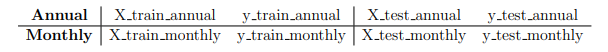

In [13]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X, y, test_size=2/3, random_state=1147)
X_test_monthly.shape

(215699, 28)

In [14]:
X_train_monthly = X_train_monthly.fillna(X_train_monthly.mean())
X_test_monthly = X_test_monthly.fillna(X_test_monthly.mean())

### 3. Pre-process (if necessary for the method).


In [15]:
# Create the instance of the scaler
scaler = StandardScaler()
scaler
# Transform the inputs X
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_train_monthly_scaled.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
X_test_monthly_scaled = scaler.transform(X_test_monthly)

### 4. Fit the training dataset and optimize the hyperparameters of the method.


Based on the function, the hyperparameters that I've choose to tune are:
- Solver
- C

##### Elbow-Method for Best Solver

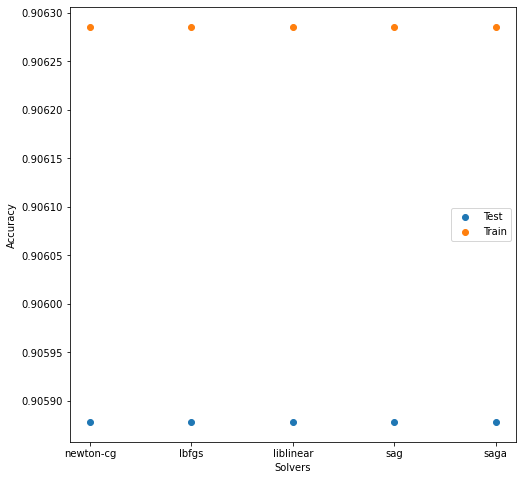

In [17]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

Train_Error_LogReg = np.zeros(shape=(len(solver_list),1))
Test_Error_LogReg = np.zeros(shape=(len(solver_list),1))

count = -1
for solver in solver_list:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    LogReg = LogisticRegression(solver = solver)
    # Fit the model
    LogReg.fit(X_train_monthly_scaled, y_train_monthly)
    Train_Error_LogReg[count,0] = LogReg.score(X_train_monthly_scaled, y_train_monthly)
    Test_Error_LogReg[count,0]  = LogReg.score(X_test_monthly_scaled, y_test_monthly)

plt.scatter(solver_list, Test_Error_LogReg, label='Test')
plt.scatter(solver_list, Train_Error_LogReg, label='Train')
plt.xlabel('Solvers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### Based on the graph above: any solver for this data set would work as they provide the same accuracy.

##### Elbow-Method for C (Regularization)

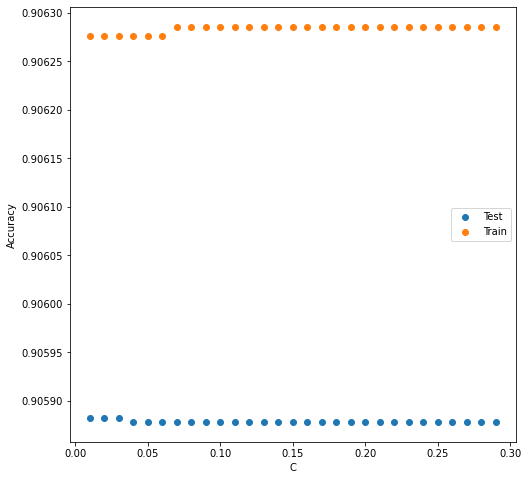

In [18]:
# C = inverse of alpha i.e. The smaller the value (>=0) for C, the stronger the regulariztion.
#                           Thus the values approach 0.
C = np.arange(0.01,0.3,0.01)

Train_Error_LogReg = np.zeros(shape=(len(C),1))
Test_Error_LogReg = np.zeros(shape=(len(C),1))

count = -1
for c in C:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    LogReg = LogisticRegression(C = c)
    # Fit the model
    LogReg.fit(X_train_monthly_scaled, y_train_monthly)
    Train_Error_LogReg[count,0] = LogReg.score(X_train_monthly_scaled, y_train_monthly)
    Test_Error_LogReg[count,0]  = LogReg.score(X_test_monthly_scaled, y_test_monthly)

plt.scatter(C, Test_Error_LogReg, label='Test')
plt.scatter(C, Train_Error_LogReg, label='Train')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### Based on the graph above, it can be observed that the teste accuracy drop between 0.01 and 0.05, thus the best value for C = 0.03

###### Elbow-Method for Class Weight

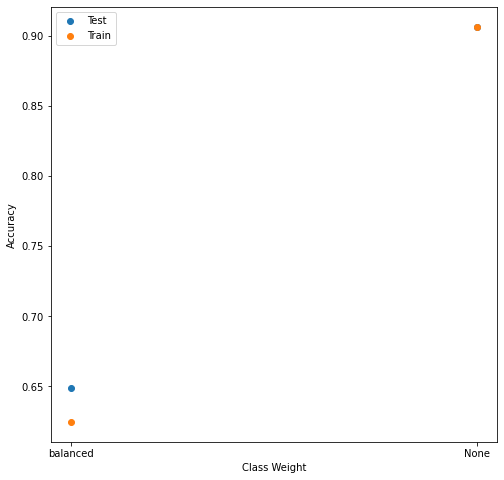

In [19]:
classweight = ['balanced', 'None']

Train_Error_LogReg = np.zeros(shape=(len(classweight),1))
Test_Error_LogReg = np.zeros(shape=(len(classweight),1))
    
count = -1
for class_weight in classweight:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    LogReg = LogisticRegression(class_weight = class_weight)
    # Fit the model
    LogReg.fit(X_train_monthly_scaled, y_train_monthly)
    Train_Error_LogReg[count,0] = LogReg.score(X_train_monthly_scaled, y_train_monthly)
    Test_Error_LogReg[count,0]  = LogReg.score(X_test_monthly_scaled, y_test_monthly)

plt.scatter(classweight, Test_Error_LogReg, label='Test')
plt.scatter(classweight, Train_Error_LogReg, label='Train')
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Best LogRes Model with tuned hyperparameters.

LogReg = LogisticRegression(C = 0.03,
                            class_weight='balanced')
LogReg.fit(X_train_monthly_scaled, y_train_monthly)

LogisticRegression(C=0.03, class_weight='balanced')

### 5. Plot coefficient values or feature importance

In [21]:
m = LogReg.coef_
m

array([[ 0.05511034, -0.04330105, -0.04261167, -0.04261167,  0.11346858,
         0.03895297,  0.03895297, -0.09645425,  0.0218009 ,  0.0218009 ,
         0.0663752 , -0.02601472, -0.02601472, -0.05421974,  0.32352591,
         0.32352591,  0.03469237, -0.15561605, -0.15561605,  0.03059164,
        -0.02552833, -0.00923642, -0.01060253, -0.02418602, -0.0147893 ,
        -0.02751567, -0.00327184, -0.06609093]])

In [22]:
b = LogReg.intercept_
b

array([-0.08384635])

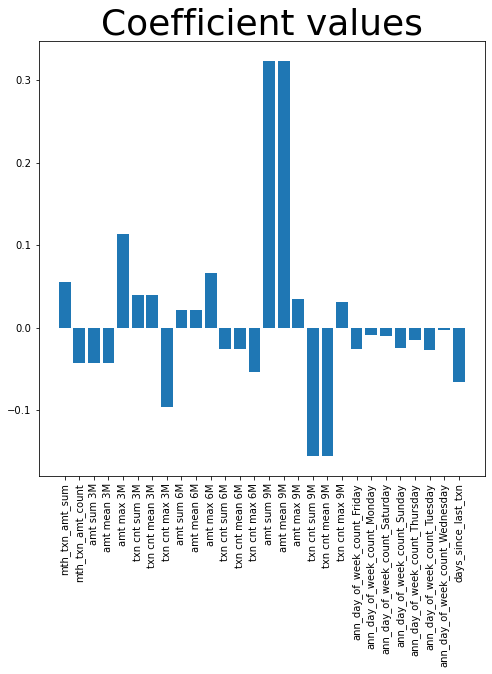

In [23]:
# Create plot
plt.figure()
# Create plot title
plt.title("Coefficient values", fontsize = '36')
# Add bars
plt.bar(range(X.shape[1]), m[0])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# Show plot
plt.show()

### 6. Plot probability distribution for test set.

#### An important note on how we can practically apply the knowledge from this model.
- You can get the model to predict whether a new client will be 0 or 1 (negative response or positive response). This is done with the method **predict**.
- A business objective typically involves quantifying risk (e.g. risk of a machine part breaking, a product failing, a customer defaulting, having cancer, providing a positive response)
- Therefore, the business may be interested in predicting the probability of a customer providing a positive response. This is done with the method **predict_proba**.
- The **predict_proba** method plugs in the input values x for every client into the sigmoid function and calculates the probability P(x).

#### Scenario 1: Predict the class of customers in the test set. For each client, give a 0 or 1.

In [24]:
y_test_predicted = LogReg.predict(X_test_monthly_scaled)
y_test_predicted

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# How many 0s an 1s does the model predict in the test set?
unique_elements, counts_elements = np.unique(y_test_predicted, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [139558  76141]]


#### Scenario 2: Predict the probability of positive response in the test set. For each client, give probability of 0 and 1 (they add up to 100%)

In [26]:
y_test_proba = LogReg.predict_proba(X_test_monthly_scaled)
y_test_proba

array([[0.57470694, 0.42529306],
       [0.42458525, 0.57541475],
       [0.57824154, 0.42175846],
       ...,
       [0.70685578, 0.29314422],
       [0.63283203, 0.36716797],
       [0.71617201, 0.28382799]])

Text(-9.075000000000003, 0.5, 'Counts of clients')

<Figure size 1152x720 with 0 Axes>

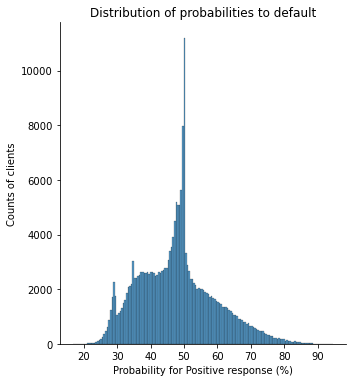

In [27]:
plt.figure(figsize=(16,10))
sns.displot(data = y_test_proba[:,1], x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability for Positive response (%)')
plt.ylabel('Counts of clients')

### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.


### ROC Curve

In [28]:
# from sklearn.metrics import RocCurveDisplay

In [29]:
# RocCurveDisplay.from_estimator(LogReg,
#                                X_train_monthly_scaled,
#                                y_train_monthly,
# #                                X_test_monthly_scaled,
# #                                y_test_monthly,
#                                sample_weight=None,
#                                drop_intermediate=True,
#                                response_method='predict_proba',
#                                pos_label=None,
#                                name=None,
#                                ax=None)
                               

In [30]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_monthly_scaled)[:, 1]

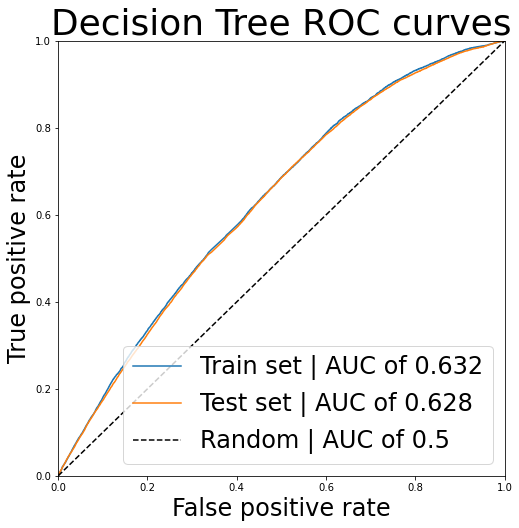

In [31]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 36)
plt.ylabel('True positive rate', fontsize = 24)
plt.xlabel('False positive rate', fontsize = 24)
plt.legend(fontsize = 24)
plt.show()

### Confusion Matrix

In [32]:
# from sklearn.metrics import ConfusionMatrixDisplay

In [33]:
# ConfusionMatrixDisplay.from_estimator(LogReg,
#                                       X_test_monthly_scaled,
#                                       y_test_monthly,
#                                       labels=None,
#                                       sample_weight=None,
#                                       normalize=None,
#                                       display_labels=None,
#                                       include_values=True,
#                                       xticks_rotation='horizontal',
#                                       values_format=None,
#                                       cmap='Blues',
#                                       ax=None,
#                                       colorbar=True)

In [34]:
cm = confusion_matrix(y_test_monthly, y_test_predicted)
print(cm)

[[129591  65806]
 [  9967  10335]]


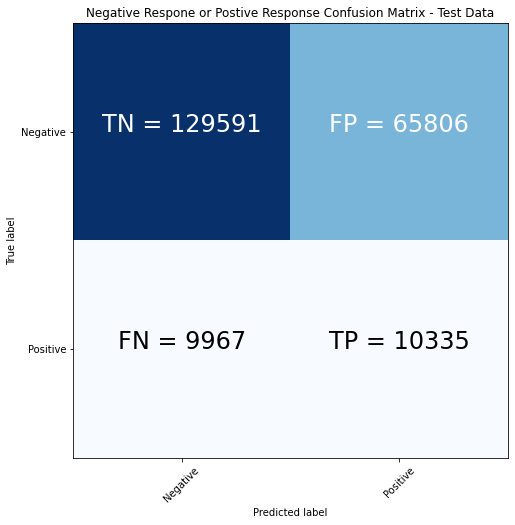

In [35]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative Respone or Postive Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 24,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

#### Classification Report

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_monthly, y_test_predicted, target_names = ['Positive Response', 'Negative Response']))

                   precision    recall  f1-score   support

Positive Response       0.93      0.66      0.77    195397
Negative Response       0.14      0.51      0.21     20302

         accuracy                           0.65    215699
        macro avg       0.53      0.59      0.49    215699
     weighted avg       0.85      0.65      0.72    215699



#### Accuracy Score

In [37]:
# Change normalize = True/False as well. DIAGONAL OVER ALL
accuracy_score(y_test_monthly, y_test_predicted, normalize = True)

0.6487095443187034

### 8. Plot decision boundary for top 2 features.


##### The coefficients with the highest values are ann_txn_amt_sum_2013 (32nd  column) and ann_txn_amt_var_2013 (37th column). Here, we will plot the decision boundary in the plane of these two variables. Explore the min and max values of these two variables and draw the contour of the probabilities on the plane, along with some labeled data.

In [38]:
# Confirm these values:
#                       ann_txn_amt_sum_2013: -1.76484282 and 
#                       ann_txn_amt_var_2013: -2.94431195
X_train_monthly_scaled.min(axis=0) 

array([-0.57802857, -0.61910376, -0.99373563, -0.99373563, -1.10402972,
       -1.0880652 , -1.0880652 , -1.20635734, -1.39822473, -1.39822473,
       -1.69256863, -1.57339288, -1.57339288, -1.85709037, -1.71169333,
       -1.71169333, -2.12576944, -1.97643474, -1.97643474, -2.29692661,
       -0.23236974, -0.23478089, -0.23525521, -0.23391297, -0.23473302,
       -0.23577711, -0.23597749, -0.93323049])

In [39]:
# Confirm these values:
#                       ann_txn_amt_sum_2013: -1.76484282 and 
#                       ann_txn_amt_var_2013: -2.94431195
X_train_monthly_scaled.max(axis=0) 

array([10.02514705,  8.9933522 ,  7.41769002,  7.41769002,  7.52628153,
        6.31795545,  6.31795545,  7.04011236,  6.61998582,  6.61998582,
        7.26825865,  7.09029273,  7.09029273,  7.02202655,  6.25291096,
        6.25291096,  7.38045819,  6.95072087,  6.95072087,  7.12822543,
       12.65901081, 12.60108486, 12.38555664, 12.5696462 , 12.60719535,
       12.44878842, 12.36924107, 11.22275575])

#### Create a 10x10 grid between the min and max values that we will use to estimate the probabilities for the contour plot.

In [40]:
# The steps 1.1111 and 1.75 were selected to create a 10x10 grid
xx, yy = np.mgrid[-2:8:1.1111, -3:13:1.75] 
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape)# Confirm that grid shape is 10x10.
grid

(100, 2)


array([[-2.    , -3.    ],
       [-2.    , -1.25  ],
       [-2.    ,  0.5   ],
       [-2.    ,  2.25  ],
       [-2.    ,  4.    ],
       [-2.    ,  5.75  ],
       [-2.    ,  7.5   ],
       [-2.    ,  9.25  ],
       [-2.    , 11.    ],
       [-2.    , 12.75  ],
       [-0.8889, -3.    ],
       [-0.8889, -1.25  ],
       [-0.8889,  0.5   ],
       [-0.8889,  2.25  ],
       [-0.8889,  4.    ],
       [-0.8889,  5.75  ],
       [-0.8889,  7.5   ],
       [-0.8889,  9.25  ],
       [-0.8889, 11.    ],
       [-0.8889, 12.75  ],
       [ 0.2222, -3.    ],
       [ 0.2222, -1.25  ],
       [ 0.2222,  0.5   ],
       [ 0.2222,  2.25  ],
       [ 0.2222,  4.    ],
       [ 0.2222,  5.75  ],
       [ 0.2222,  7.5   ],
       [ 0.2222,  9.25  ],
       [ 0.2222, 11.    ],
       [ 0.2222, 12.75  ],
       [ 1.3333, -3.    ],
       [ 1.3333, -1.25  ],
       [ 1.3333,  0.5   ],
       [ 1.3333,  2.25  ],
       [ 1.3333,  4.    ],
       [ 1.3333,  5.75  ],
       [ 1.3333,  7.5   ],
 

#### We need all 75 variables to predict the probability over the 10x10 grid of ann_txn_amt_sum_2013 and ann_txn_amt_var_2013. What values should we use for the other 75 variables? I pick the median of each column. Create 100 rows so that they much the 10x10 grid.

In [41]:
## np.ones is a table full of ones with 100x75 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
# The numbre of columns in 100x... must match with the number of columns in X_train_scaled.
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly_scaled, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
1,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
2,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
3,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
4,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
96,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
97,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
98,-0.578029,-0.619104,-0.134364,-0.134364,0.0,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,...,-2.664856e-13,-3.488007e-16,-0.23237,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556


In [42]:
# Then, we replace the 32nd and 37th column with the values of the grid
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:12,:] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 14)|(x.name == 15)  else '' for i in x])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,-3.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
1,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,-1.250000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
2,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,0.500000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
3,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,2.250000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
4,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,4.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
5,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,5.750000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
6,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,7.500000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
7,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,9.250000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
8,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,11.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556
9,-0.578029,-0.619104,-0.134364,-0.134364,0.000000,-0.162313,-0.162313,0.168054,-0.013261,-0.013261,-0.000000,-0.240518,-0.240518,-0.377238,-2.000000,12.750000,-0.000000,-0.000000,-0.000000,-0.000000,-0.232370,-0.234781,-0.235255,-0.233913,-0.234733,-0.235777,-0.235977,-0.319556


#### Score the artificial data on the grid

In [43]:
probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

#### Plot the contour for the grid and a scatter of 50 original datapoints from X_train. 
- The decision boundary is the thin **white** slice, where P(y=1) = 0.50
- Darker **blue** indicates higher probability for +ve Response, i.e. 1.0
- Darker **red** indicates lower probability for -ve Response, i.e. 0.0

[None,
 (-2.0, 4.0),
 (-2.0, 4.0),
 Text(0.5, 0, 'amt sum 9M'),
 Text(0, 0.5, 'amt mean 9M')]

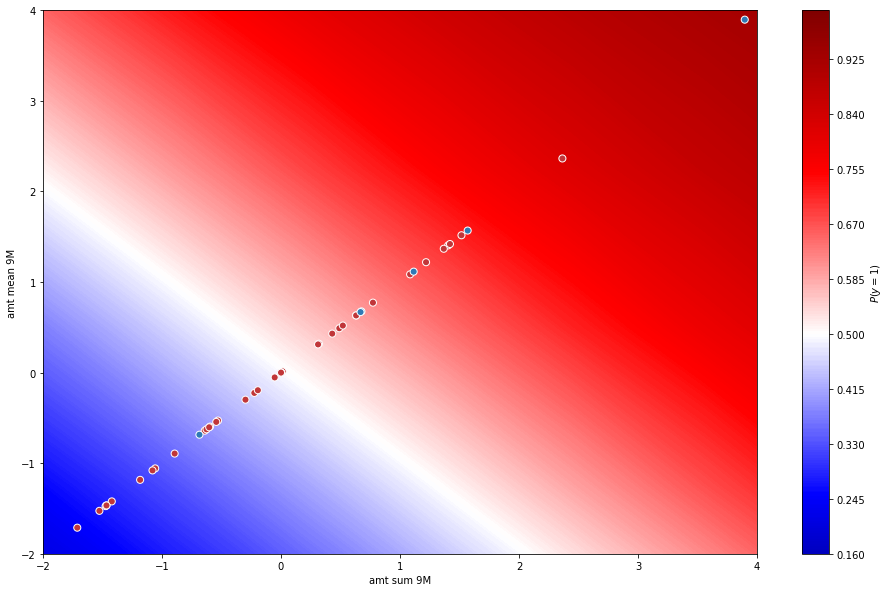

In [44]:
f, ax = plt.subplots(figsize=(16, 10))
contour = ax.contourf(xx, yy, probs, 369, cmap="seismic",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly_scaled[:50,14], X_train_monthly_scaled[:50, 15], c=y_train_monthly[:50], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2,4), ylim=(-2, 4),
       xlabel="amt sum 9M", ylabel="amt mean 9M")

### Simple Tree

### How to read the tree:
- Observe nodes 0, 1 and 2. Node 0 has the whole population.
- The second line in node 0 is the condition: IF PAY_0 <= 1.5 THEN:
- IF TRUE go to node 1
- IF FALSE go to node 2
- Nodes 1 and 2 have information like entropy, samples, [-ves, +ves] and the class of the majority in the node (Paid or Default)
- Notice that each node is coloured with the class of the majority. Also, darker colour implies higher probability of the majority class (will become obvious later with more branches).

### Tree components and terms:
- **Root node**: the top-level node showing the entire population
- **Branch**: the arrows that stem from the root showing a decision taken (a split of the population)
- In the tree above, the population is split with the decision IF PAY_0 <= 1.5
- **Leaf nodes**: the end nodes that do not split any further. In this simple case with depth=1, the first 2 nodes are leaf nodes.
- Next, we will run "deeper" trees which will have more leaves.

### Next, open up the Decision Tree Classifier documentation in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and explore the different parameters before changing them and observe what happens to the tree. In particular, change:
- **max_depth**: from 2-6 manually, any observations? Some leaf nodes have very few samples. Not statistically confident in those.
- **min_samples_split**: minimum number of samples to split an internal node. Fixes the above issue of statistical confidence.
- **min_samples_leaf**: minimum number of samples to be at a leaf node. Similar behaviour to thAe above (creates more leaf nodes though).

### 1. Separate the inputs X and the output y in two data frames.

They have already been seperated from above and have been maintained as such.

### 2. Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1147 for consistency (i.e. the course code value). Use the following names for consistency.

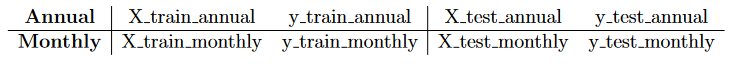

The split has also be maintained as from above.

### 3. Pre-process (if necessary for the method).

In [45]:
X_train_monthly

,,mth_txn_amt_sum,mth_txn_amt_count,amt sum 3M,amt mean 3M,amt max 3M,txn cnt sum 3M,txn cnt mean 3M,txn cnt max 3M,amt sum 6M,amt mean 6M,...,txn cnt mean 9M,txn cnt max 9M,ann_day_of_week_count_Friday,ann_day_of_week_count_Monday,ann_day_of_week_count_Saturday,ann_day_of_week_count_Sunday,ann_day_of_week_count_Thursday,ann_day_of_week_count_Tuesday,ann_day_of_week_count_Wednesday,days_since_last_txn
customer_id,ME DT,,,,,,,,,,,,,,,,,,,,,
CS5331,2013-11-30,0,0,103.0,34.333333,103.0,1.0,0.333333,1.0,370.000000,61.666667,...,0.555556,2.000000,0,0,0,0,0,0,0,89
CS4919,2011-08-31,0,0,37.0,12.333333,37.0,1.0,0.333333,1.0,153.455407,25.575901,...,0.393593,1.462211,0,0,0,0,0,0,0,37
CS3011,2012-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.111111,1.000000,0,0,0,0,0,0,0,201
CS2176,2011-07-31,40,1,195.0,65.000000,155.0,4.0,1.333333,3.0,153.455407,25.575901,...,0.393593,1.462211,0,0,0,0,0,1,0,12
CS7249,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,20.000000,3.333333,...,0.222222,1.000000,0,0,0,0,0,0,0,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS4686,2014-08-31,77,1,77.0,25.666667,77.0,1.0,0.333333,1.0,306.000000,51.000000,...,0.444444,2.000000,0,1,0,0,0,0,0,27
CS1696,2013-04-30,0,0,75.0,25.000000,75.0,1.0,0.333333,1.0,169.000000,28.166667,...,0.333333,1.000000,0,0,0,0,0,0,0,47
CS8273,2013-10-31,31,1,31.0,10.333333,31.0,1.0,0.333333,1.0,31.000000,5.166667,...,0.222222,1.000000,0,0,1,0,0,0,0,5


In [46]:
X_test_monthly

,,mth_txn_amt_sum,mth_txn_amt_count,amt sum 3M,amt mean 3M,amt max 3M,txn cnt sum 3M,txn cnt mean 3M,txn cnt max 3M,amt sum 6M,amt mean 6M,...,txn cnt mean 9M,txn cnt max 9M,ann_day_of_week_count_Friday,ann_day_of_week_count_Monday,ann_day_of_week_count_Saturday,ann_day_of_week_count_Sunday,ann_day_of_week_count_Thursday,ann_day_of_week_count_Tuesday,ann_day_of_week_count_Wednesday,days_since_last_txn
customer_id,ME DT,,,,,,,,,,,,,,,,,,,,,
CS4559,2012-02-29,0,0,170.0,56.666667,101.0,3.0,1.000000,2.0,170.0,28.333333,...,0.444444,2.0,0,0,0,0,0,0,0,41
CS2218,2013-06-30,40,1,104.0,34.666667,64.0,2.0,0.666667,1.0,325.0,54.166667,...,0.666667,2.0,0,0,0,0,0,0,1,11
CS7447,2014-07-31,0,0,62.0,20.666667,62.0,1.0,0.333333,1.0,129.0,21.500000,...,0.222222,1.0,0,0,0,0,0,0,0,45
CS4482,2013-03-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,57.0,9.500000,...,0.333333,1.0,0,0,0,0,0,0,0,147
CS3648,2014-10-31,0,0,79.0,26.333333,79.0,1.0,0.333333,1.0,79.0,13.166667,...,0.444444,2.0,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS4748,2012-01-31,70,1,70.0,23.333333,70.0,1.0,0.333333,1.0,214.0,35.666667,...,0.555556,2.0,0,1,0,0,0,0,0,8
CS8979,2014-09-30,0,0,43.0,14.333333,43.0,1.0,0.333333,1.0,85.0,14.166667,...,0.444444,1.0,0,0,0,0,0,0,0,89
CS8882,2013-08-31,20,1,20.0,6.666667,20.0,1.0,0.333333,1.0,20.0,3.333333,...,0.111111,1.0,0,0,1,0,0,0,0,21


In [47]:
y_train_monthly

customer_id  ME DT     
CS5331       2013-11-30    0
CS4919       2011-08-31    0
CS3011       2012-12-31    0
CS2176       2011-07-31    0
CS7249       2015-01-31    0
                          ..
CS4686       2014-08-31    0
CS1696       2013-04-30    1
CS8273       2013-10-31    0
CS6043       2012-03-31    0
CS5450       2012-07-31    0
Name: response, Length: 107849, dtype: int64

In [48]:
y_test_monthly

customer_id  ME DT     
CS4559       2012-02-29    0
CS2218       2013-06-30    0
CS7447       2014-07-31    0
CS4482       2013-03-31    0
CS3648       2014-10-31    0
                          ..
CS4748       2012-01-31    1
CS8979       2014-09-30    0
CS8882       2013-08-31    0
CS8157       2014-09-30    0
CS8371       2013-11-30    0
Name: response, Length: 215699, dtype: int64

### 4. Fit the training dataset and optimize the hyperparameters of the method.

- Create the simplest Decision Tree Classifiers
- Fit the classifier
- Draw the leaves and observe their distribution

Based on the function, the hyperparameters that I've choose to tune are:
- criterion
- max_depth
- min_samples_split
- min_samples_leaf=1
- class_weight
- ccp_alpha=0.0

###### Elbow-Method for class weight

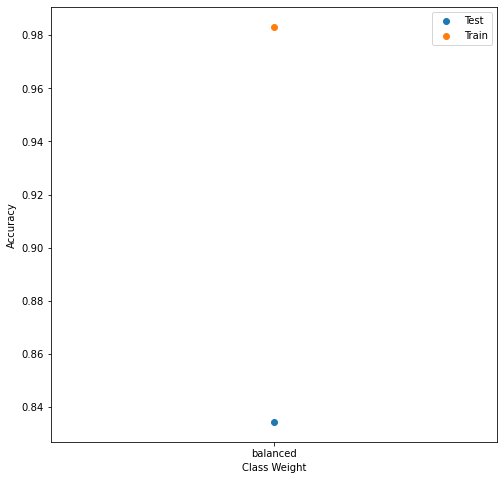

In [49]:
classweight = ['balanced']

Train_Error_SimpleTree = np.zeros(shape=(len(classweight),1))
Test_Error_SimpleTree = np.zeros(shape=(len(classweight),1))
    
count = -1
for class_weight in classweight:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    SimpleTree = DecisionTreeClassifier(class_weight = class_weight)
    # Fit the model
    SimpleTree.fit(X_train_monthly, y_train_monthly)
    Train_Error_SimpleTree[count,0] = SimpleTree.score(X_train_monthly, y_train_monthly)
    Test_Error_SimpleTree[count,0]  = SimpleTree.score(X_test_monthly, y_test_monthly)

plt.scatter(classweight, Test_Error_SimpleTree, label='Test')
plt.scatter(classweight, Train_Error_SimpleTree, label='Train')
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:
                            
                            Best Class weight = 'balanced'

###### Elbow-Method for criterion

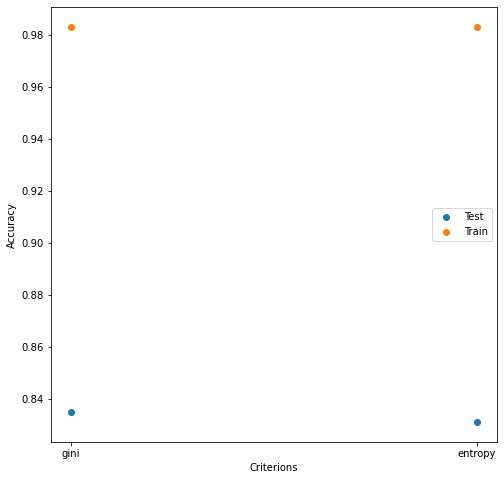

In [50]:
criterions = ['gini', 'entropy']

Train_Error_SimpleTree = np.zeros(shape=(len(criterions),1))
Test_Error_SimpleTree = np.zeros(shape=(len(criterions),1))
    
count = -1
for criterion in criterions:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    SimpleTree = DecisionTreeClassifier(criterion = criterion, class_weight = 'balanced')
    # Fit the model
    SimpleTree.fit(X_train_monthly, y_train_monthly)
    Train_Error_SimpleTree[count,0] = SimpleTree.score(X_train_monthly, y_train_monthly)
    Test_Error_SimpleTree[count,0]  = SimpleTree.score(X_test_monthly, y_test_monthly)

plt.scatter(criterions, Test_Error_SimpleTree, label='Test')
plt.scatter(criterions, Train_Error_SimpleTree, label='Train')
plt.xlabel('Criterions')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best criterion = 'gini'
                        Because there's a very slight drop in the accuracy when entropy is used.

###### Elbow-Method for max_depth

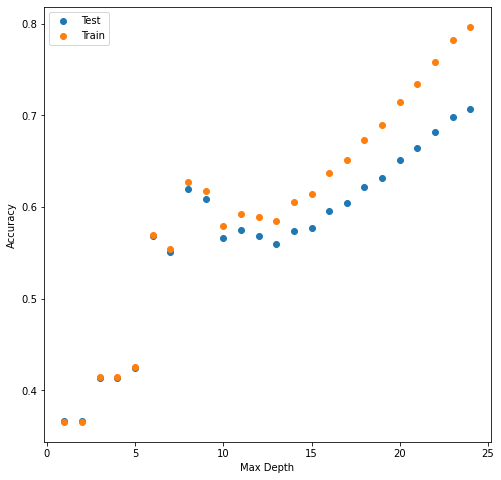

In [51]:
maxdepth = list(range(1,25))

Train_Error_SimpleTree = np.zeros(shape=(len(maxdepth),1))
Test_Error_SimpleTree = np.zeros(shape=(len(maxdepth),1))
    
count = -1
for max_depth in maxdepth:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    SimpleTree = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth, class_weight = 'balanced')
    # Fit the model
    SimpleTree.fit(X_train_monthly, y_train_monthly)
    Train_Error_SimpleTree[count,0] = SimpleTree.score(X_train_monthly, y_train_monthly)
    Test_Error_SimpleTree[count,0]  = SimpleTree.score(X_test_monthly, y_test_monthly)

plt.scatter(maxdepth, Test_Error_SimpleTree, label='Test')
plt.scatter(maxdepth, Train_Error_SimpleTree, label='Train')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best Max Depth = '8'
                            Because after depth, the accuracy decreases then increases till it plataeus, 
                        but any depth after the drop would have high varience thus be an overfitted tree.

###### Elbow-Method for min_samples_split

This indicates the larger view of the min sample split, where we can see the accuracy decreases after a certain point and the best accuracy is achieved in the inital region of 2 - 3000.

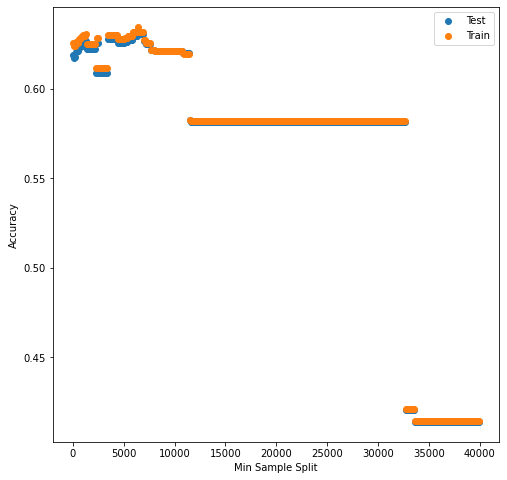

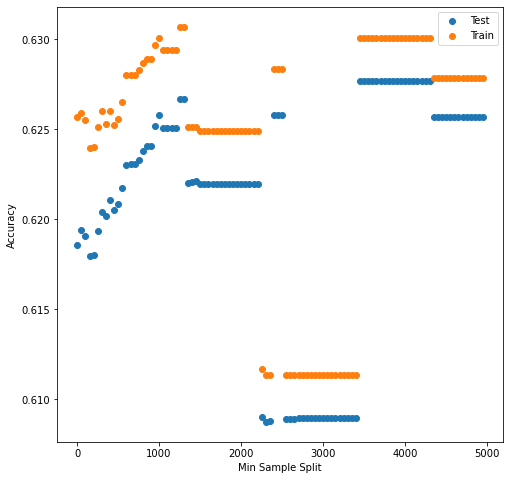

In [52]:
minsamplesplit = list(range(2,5000,50))

Train_Error_SimpleTree = np.zeros(shape=(len(minsamplesplit),1))
Test_Error_SimpleTree = np.zeros(shape=(len(minsamplesplit),1))
    
count = -1
for mss in minsamplesplit:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    SimpleTree = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = 8, 
                                        min_samples_split = mss, 
                                        class_weight = 'balanced')
    # Fit the model
    SimpleTree.fit(X_train_monthly, y_train_monthly)
    Train_Error_SimpleTree[count,0] = SimpleTree.score(X_train_monthly, y_train_monthly)
    Test_Error_SimpleTree[count,0]  = SimpleTree.score(X_test_monthly, y_test_monthly)

plt.scatter(minsamplesplit, Test_Error_SimpleTree, label='Test')
plt.scatter(minsamplesplit, Train_Error_SimpleTree, label='Train')
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best Min Sample split = '1300'
                        Since there's a decrease in the accuracy and then an increase with consistant flats in 
                        through each stage as observed, indicating overfitting after 1300.

###### Elbow-Method for min_samples_leaf

The graphs below are different iterations of the min sample leaf to get the optimum value without overfitting.

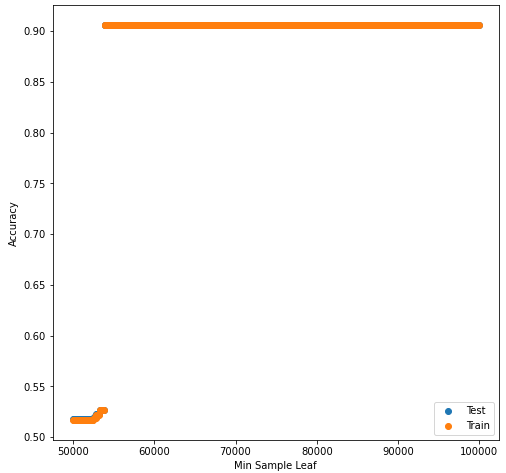

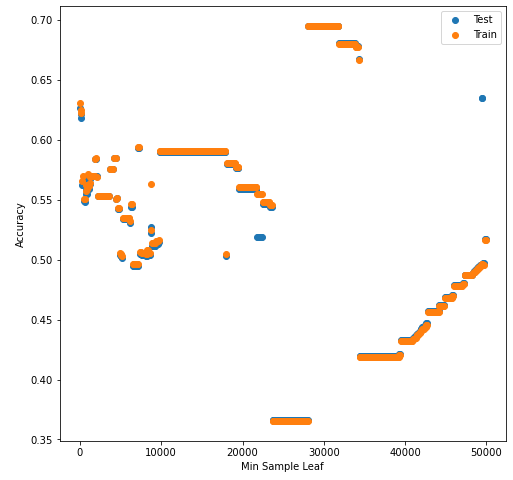

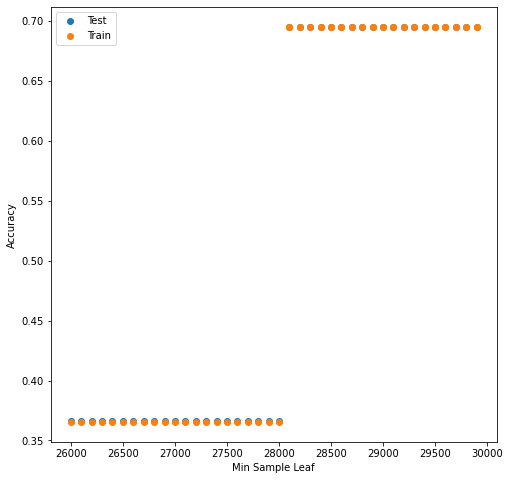

In [53]:
minsampleleaf = list(range(26000,30000,100))

Train_Error_SimpleTree = np.zeros(shape=(len(minsampleleaf),1))
Test_Error_SimpleTree = np.zeros(shape=(len(minsampleleaf),1))
    
count = -1
for msl in minsampleleaf:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    SimpleTree = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = 8, 
                                        min_samples_split = 1300,
                                        min_samples_leaf = msl,
                                        class_weight = 'balanced')
    # Fit the model
    SimpleTree.fit(X_train_monthly, y_train_monthly)
    Train_Error_SimpleTree[count,0] = SimpleTree.score(X_train_monthly, y_train_monthly)
    Test_Error_SimpleTree[count,0]  = SimpleTree.score(X_test_monthly, y_test_monthly)

plt.scatter(minsampleleaf, Test_Error_SimpleTree, label='Test')
plt.scatter(minsampleleaf, Train_Error_SimpleTree, label='Train')
plt.xlabel('Min Sample Leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best Min Sample leaf = '28100 - 32000'
                        But, I'll select 28100.

###### Elbow-Method for ccp alpha

The graphs below indicate the streamlining of the best value/range for ccp_alpha.

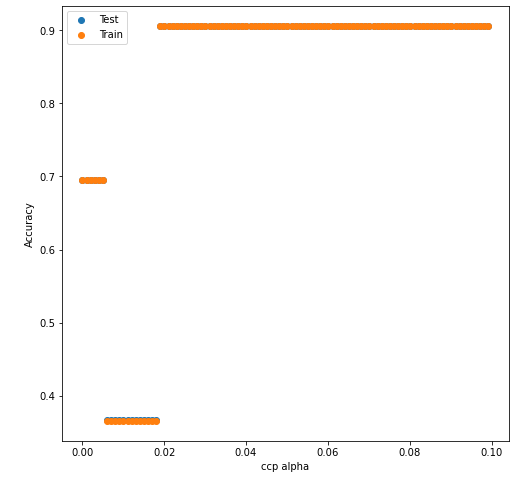

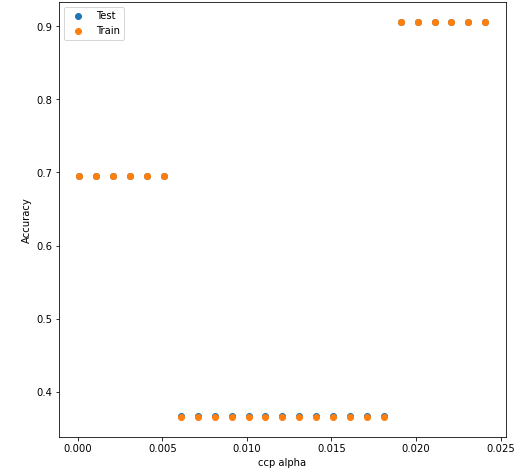

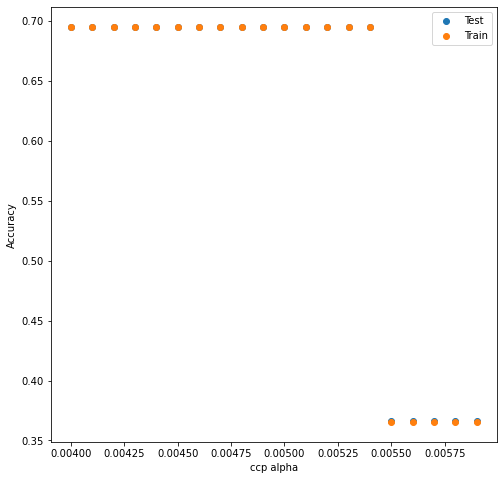

In [54]:
ccpalpha = np.arange(0.004,0.006,0.0001)

Train_Error_SimpleTree = np.zeros(shape=(len(ccpalpha),1))
Test_Error_SimpleTree = np.zeros(shape=(len(ccpalpha),1))
    
count = -1
for ccp in ccpalpha:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    SimpleTree = DecisionTreeClassifier(criterion = 'gini', 
                                        max_depth = 8, 
                                        min_samples_split = 1300,
                                        min_samples_leaf = 28100,
                                        class_weight = 'balanced',
                                        ccp_alpha = ccp)
    # Fit the model
    SimpleTree.fit(X_train_monthly, y_train_monthly)
    Train_Error_SimpleTree[count,0] = SimpleTree.score(X_train_monthly, y_train_monthly)
    Test_Error_SimpleTree[count,0]  = SimpleTree.score(X_test_monthly, y_test_monthly)

plt.scatter(ccpalpha, Test_Error_SimpleTree, label='Test')
plt.scatter(ccpalpha, Train_Error_SimpleTree, label='Train')
plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best ccp alpha = '0.0001 - 0.0054'
                        I've choosen 0.0054.

In [55]:
# Best Simple Tree Model after hypertuning the parameters.

Simple_Tree = DecisionTreeClassifier(criterion = 'gini', 
                                   max_depth = 8, 
                                   min_samples_split = 1300,
                                   min_samples_leaf = 28100,
                                   class_weight = 'balanced',
                                   ccp_alpha = 0.0054)
Simple_Tree  = Simple_Tree.fit(X_train_monthly, y_train_monthly)

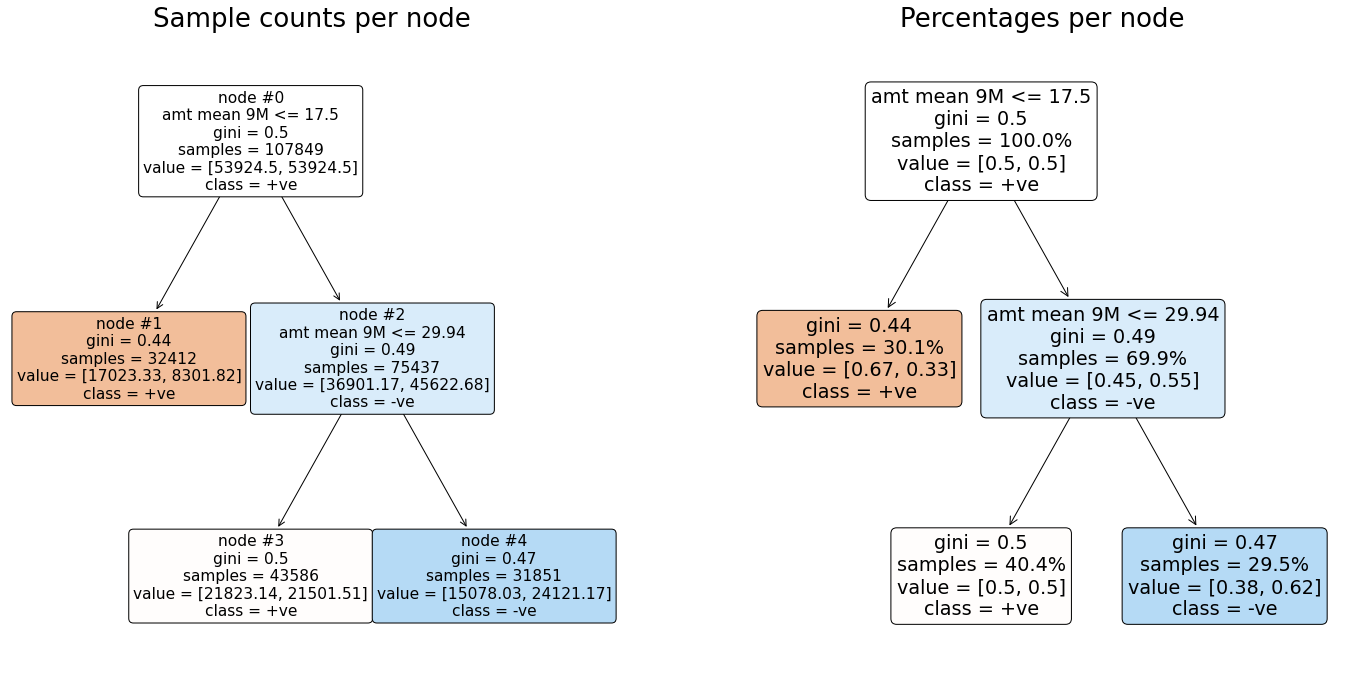

In [56]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(Simple_Tree, filled=True, feature_names = list(X.columns), class_names = ['+ve', '-ve'], rounded = True, precision = 2, node_ids=True)
fig_1_a.set_title('Sample counts per node', fontsize = 26)

fig_1_b = plt.subplot(122)
axs2 = plot_tree(Simple_Tree, filled=True, feature_names = list(X.columns), class_names = ['+ve', '-ve'], rounded = True, precision = 2, proportion=True)
fig_1_b.set_title('Percentages per node', fontsize = 26)

plt.show()

### 5. Plot coefficient values or feature importance.

In [57]:
# Calculate feature importances
importances = Simple_Tree.feature_importances_
importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

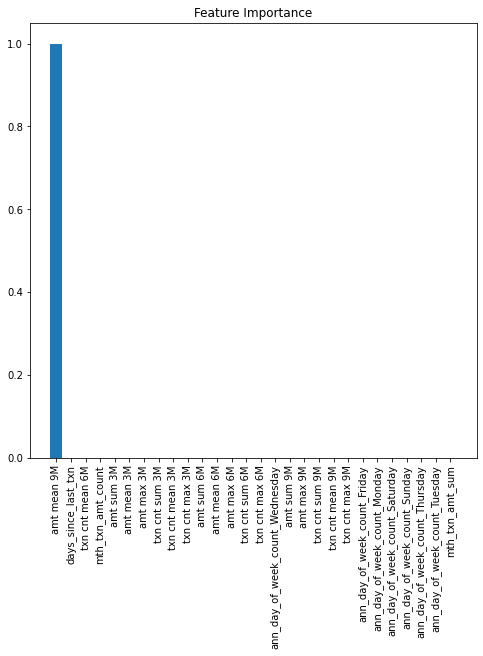

In [58]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [monthly_features_outputs.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

### 6. Plot probability distribution for test set.

#### An important note on how we can practically apply the knowledge from this model.
- You can get the model to predict whether a new client will be 0 or 1 (negative or positive). This is done with the method **predict**.
- A business objective typically involves quantifying risk (e.g. risk of a machine part breaking, a product failing, a customer defaulting, having cancer)
- Therefore, the business may be interested in predicting the probability of a positive response. This is done with the method **predict_proba**.
- Simply place the client in the leaf node through the tree and use either the majority class or the fraction of the samples in the same class.

#### Scenario 1: Predict the class of customers in the test set. For each client, give a 0 or 1.

In [59]:
y_test_predicted1 = Simple_Tree.predict(X_test_monthly)
y_test_predicted1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
# How many 0s an 1s does the model predict in the test set?
unique_elements, counts_elements = np.unique(y_test_predicted1, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1]
 [152427  63272]]


#### Scenario 2: Predict the probability of positive response in the test set. For each client, give probability of 0 and 1 (they add up to 100%)

In [61]:
y_test_proba1 = Simple_Tree.predict_proba(X_test_monthly)
y_test_proba1

array([[0.50371191, 0.49628809],
       [0.38465144, 0.61534856],
       [0.67219062, 0.32780938],
       ...,
       [0.67219062, 0.32780938],
       [0.67219062, 0.32780938],
       [0.67219062, 0.32780938]])

In [62]:
# How many different probabilities of defaulting are there and how many clients in each?
unique_elements, counts_elements = np.unique(y_test_proba1[:,1], return_counts=True)
print("Frequency of unique values of the said array:")
print(unique_elements)
print(counts_elements)

Frequency of unique values of the said array:
[0.32780938 0.49628809 0.61534856]
[65189 87238 63272]


Text(-9.075000000000003, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

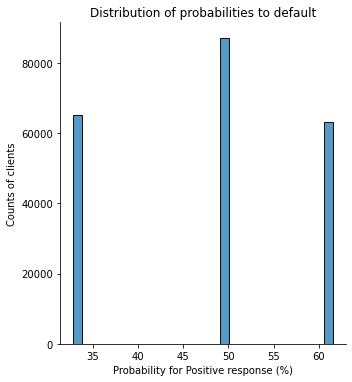

In [63]:
plt.figure(figsize=(5,5))
sns.displot(data = 100*y_test_proba1[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability for Positive response (%)')
plt.ylabel('Counts of clients')

### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

### ROC Curve

In [64]:
# Scores for train set
scores_train = Simple_Tree.predict_proba(X_train_monthly)[:, 1]
# Scores for test set
scores_test = Simple_Tree.predict_proba(X_test_monthly)[:, 1]

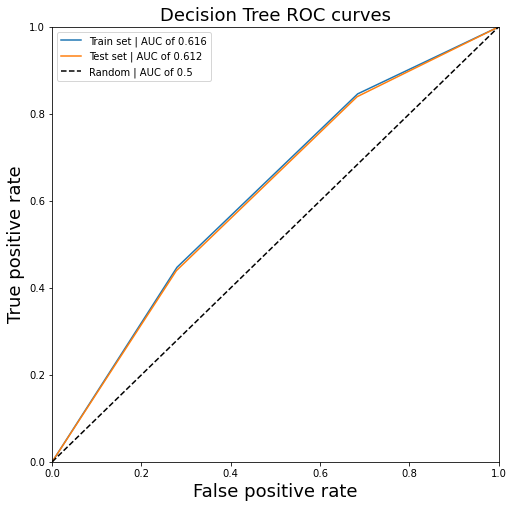

In [65]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

### Confusion Matrix

In [66]:
cm1 = confusion_matrix(y_test_monthly, y_test_predicted1)
print(cm1)

[[141048  54349]
 [ 11379   8923]]


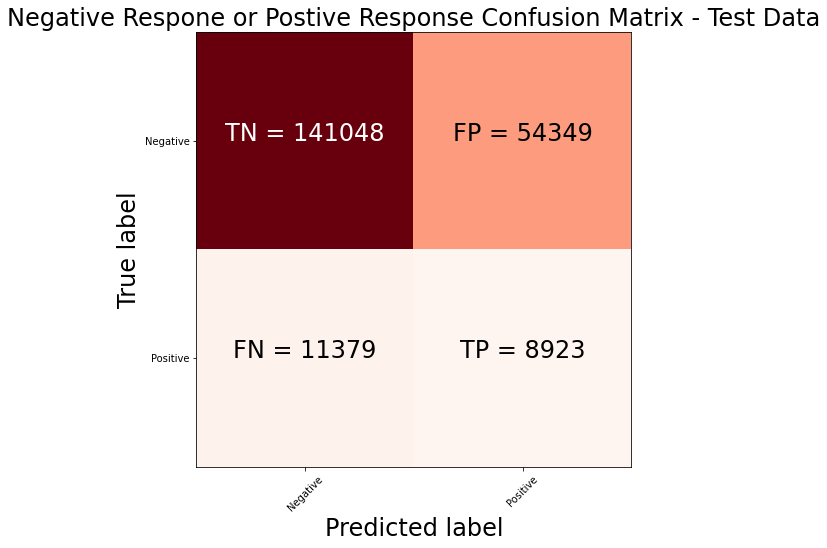

In [67]:
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Reds)
classNames = ['Negative','Positive']
plt.title('Negative Respone or Postive Response Confusion Matrix - Test Data', fontsize = 24)
plt.ylabel('True label', fontsize = 24)
plt.xlabel('Predicted label', fontsize = 24)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm1.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm1[i][j]), fontsize = 24,
                 horizontalalignment="center",
                 color="white" if cm1[i, j] > thresh else "black")
plt.show()

#### Classification Report

In [68]:
print(classification_report(y_test_monthly, y_test_predicted1, target_names = ['Positive Response', 'Negative Response']))

                   precision    recall  f1-score   support

Positive Response       0.93      0.72      0.81    195397
Negative Response       0.14      0.44      0.21     20302

         accuracy                           0.70    215699
        macro avg       0.53      0.58      0.51    215699
     weighted avg       0.85      0.70      0.75    215699



#### Accuracy Score

In [69]:
# Change normalize = True/False as well. DIAGONAL OVER ALL
accuracy_score(y_test_monthly, y_test_predicted1, normalize = True)

0.6952790694439938

### 8. Plot decision boundary for top 2 features

In [70]:
# from sklearn.inspection import DecisionBoundaryDisplay

In [71]:
# DecisionBoundaryDisplay.from_estimator(Simple_Tree,
#                                        X_train_monthly.iloc[:,14:16],
#                                        grid_resolution=100,
#                                        eps=1.0,
#                                        plot_method='contour',
#                                        response_method='predict',
#                                        xlabel=None,
#                                        ylabel=None,
#                                        ax=None)

In [72]:
xx, yy = np.mgrid[-2:8:1.1111, -2:8:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x75 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:12,:] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 14)|(x.name == 15)  else '' for i in x])


(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,-2.000000,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
1,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,-0.888900,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
2,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,0.222200,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
3,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,1.333300,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
4,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,2.444400,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
5,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,3.555500,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
6,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,4.666600,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
7,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,5.777700,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
8,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,6.888800,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
9,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,7.999900,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000


In [73]:
probs = Simple_Tree.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[None,
 (-2.0, 8.0),
 (-2.0, 8.0),
 Text(0.5, 0, 'amt mean 9M'),
 Text(0, 0.5, 'amt sum 9M')]

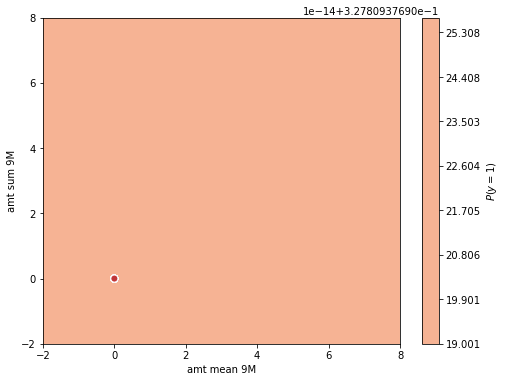

In [74]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly['amt mean 9M'][:], X_train_monthly['amt sum 9M'][:], c=y_train_monthly[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
# plt.annotate('Node #6 \n P(default) = 69.9%', xy=(5,1), xycoords='data',horizontalalignment= 'center', fontsize = 14)
# plt.annotate('Node #2 \n P = 15.0%', xy=(-0.5,0.5), xycoords='data',horizontalalignment= 'center', fontsize = 14)
# plt.annotate('Node #5 \n P = 43.1%', xy=(-0.5,6.0), xycoords='data',horizontalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(-2, 8), ylim=(-2, 8),
       xlabel="amt mean 9M", ylabel="amt sum 9M")

### Random Forest

### 1. Separate the inputs X and the output y in two data frames.

They have already been seperated from above and have been maintained as such.

### 2. Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1147 for consistency (i.e. the course code value). Use the following names for consistency.

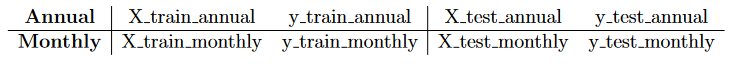

The split has also be maintained as from above.

### 3. Pre-process (if necessary for the method).

In [75]:
X_train_monthly

,,mth_txn_amt_sum,mth_txn_amt_count,amt sum 3M,amt mean 3M,amt max 3M,txn cnt sum 3M,txn cnt mean 3M,txn cnt max 3M,amt sum 6M,amt mean 6M,...,txn cnt mean 9M,txn cnt max 9M,ann_day_of_week_count_Friday,ann_day_of_week_count_Monday,ann_day_of_week_count_Saturday,ann_day_of_week_count_Sunday,ann_day_of_week_count_Thursday,ann_day_of_week_count_Tuesday,ann_day_of_week_count_Wednesday,days_since_last_txn
customer_id,ME DT,,,,,,,,,,,,,,,,,,,,,
CS5331,2013-11-30,0,0,103.0,34.333333,103.0,1.0,0.333333,1.0,370.000000,61.666667,...,0.555556,2.000000,0,0,0,0,0,0,0,89
CS4919,2011-08-31,0,0,37.0,12.333333,37.0,1.0,0.333333,1.0,153.455407,25.575901,...,0.393593,1.462211,0,0,0,0,0,0,0,37
CS3011,2012-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.111111,1.000000,0,0,0,0,0,0,0,201
CS2176,2011-07-31,40,1,195.0,65.000000,155.0,4.0,1.333333,3.0,153.455407,25.575901,...,0.393593,1.462211,0,0,0,0,0,1,0,12
CS7249,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,20.000000,3.333333,...,0.222222,1.000000,0,0,0,0,0,0,0,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS4686,2014-08-31,77,1,77.0,25.666667,77.0,1.0,0.333333,1.0,306.000000,51.000000,...,0.444444,2.000000,0,1,0,0,0,0,0,27
CS1696,2013-04-30,0,0,75.0,25.000000,75.0,1.0,0.333333,1.0,169.000000,28.166667,...,0.333333,1.000000,0,0,0,0,0,0,0,47
CS8273,2013-10-31,31,1,31.0,10.333333,31.0,1.0,0.333333,1.0,31.000000,5.166667,...,0.222222,1.000000,0,0,1,0,0,0,0,5


In [76]:
X_test_monthly

,,mth_txn_amt_sum,mth_txn_amt_count,amt sum 3M,amt mean 3M,amt max 3M,txn cnt sum 3M,txn cnt mean 3M,txn cnt max 3M,amt sum 6M,amt mean 6M,...,txn cnt mean 9M,txn cnt max 9M,ann_day_of_week_count_Friday,ann_day_of_week_count_Monday,ann_day_of_week_count_Saturday,ann_day_of_week_count_Sunday,ann_day_of_week_count_Thursday,ann_day_of_week_count_Tuesday,ann_day_of_week_count_Wednesday,days_since_last_txn
customer_id,ME DT,,,,,,,,,,,,,,,,,,,,,
CS4559,2012-02-29,0,0,170.0,56.666667,101.0,3.0,1.000000,2.0,170.0,28.333333,...,0.444444,2.0,0,0,0,0,0,0,0,41
CS2218,2013-06-30,40,1,104.0,34.666667,64.0,2.0,0.666667,1.0,325.0,54.166667,...,0.666667,2.0,0,0,0,0,0,0,1,11
CS7447,2014-07-31,0,0,62.0,20.666667,62.0,1.0,0.333333,1.0,129.0,21.500000,...,0.222222,1.0,0,0,0,0,0,0,0,45
CS4482,2013-03-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,57.0,9.500000,...,0.333333,1.0,0,0,0,0,0,0,0,147
CS3648,2014-10-31,0,0,79.0,26.333333,79.0,1.0,0.333333,1.0,79.0,13.166667,...,0.444444,2.0,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS4748,2012-01-31,70,1,70.0,23.333333,70.0,1.0,0.333333,1.0,214.0,35.666667,...,0.555556,2.0,0,1,0,0,0,0,0,8
CS8979,2014-09-30,0,0,43.0,14.333333,43.0,1.0,0.333333,1.0,85.0,14.166667,...,0.444444,1.0,0,0,0,0,0,0,0,89
CS8882,2013-08-31,20,1,20.0,6.666667,20.0,1.0,0.333333,1.0,20.0,3.333333,...,0.111111,1.0,0,0,1,0,0,0,0,21


In [77]:
y_train_monthly

customer_id  ME DT     
CS5331       2013-11-30    0
CS4919       2011-08-31    0
CS3011       2012-12-31    0
CS2176       2011-07-31    0
CS7249       2015-01-31    0
                          ..
CS4686       2014-08-31    0
CS1696       2013-04-30    1
CS8273       2013-10-31    0
CS6043       2012-03-31    0
CS5450       2012-07-31    0
Name: response, Length: 107849, dtype: int64

In [78]:
y_test_monthly

customer_id  ME DT     
CS4559       2012-02-29    0
CS2218       2013-06-30    0
CS7447       2014-07-31    0
CS4482       2013-03-31    0
CS3648       2014-10-31    0
                          ..
CS4748       2012-01-31    1
CS8979       2014-09-30    0
CS8882       2013-08-31    0
CS8157       2014-09-30    0
CS8371       2013-11-30    0
Name: response, Length: 215699, dtype: int64

### 4. Fit the training dataset and optimize the hyperparameters of the method.

These are the hyperparameters that I am going to tune:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- class_weight
- ccp_alpha

###### Elbow-Method for class weight

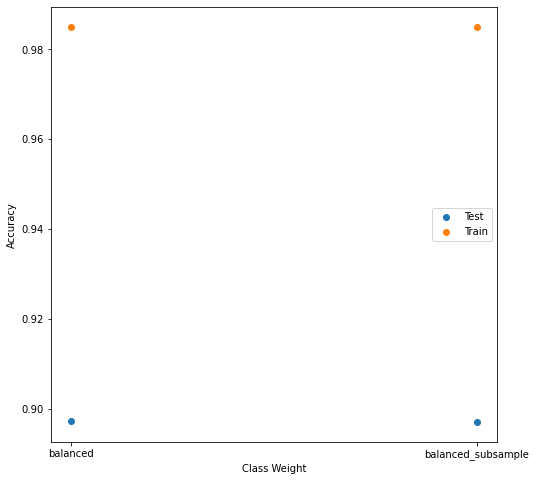

In [79]:
classweight = ['balanced', 'balanced_subsample']

Train_Error_RandomForest = np.zeros(shape=(len(classweight),1))
Test_Error_RandomForest = np.zeros(shape=(len(classweight),1))
    
count = -1
for class_weight in classweight:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(class_weight = class_weight)
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(classweight, Test_Error_RandomForest, label='Test')
plt.scatter(classweight, Train_Error_RandomForest, label='Train')
plt.xlabel('Class Weight')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:
                            
                            Best Class weight = 'balanced'

###### Elbow-Method for n-estimators

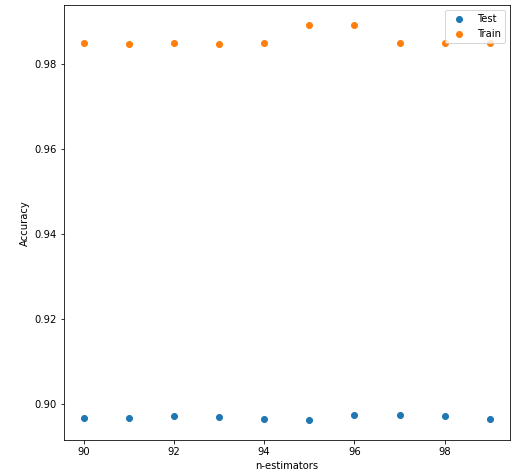

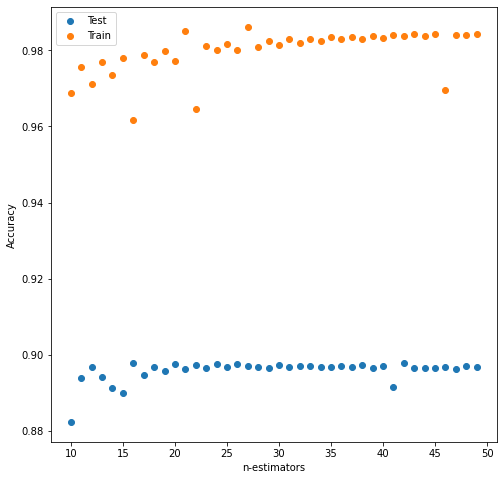

In [80]:
nestimators = list(range(10,50))

Train_Error_RandomForest = np.zeros(shape=(len(nestimators),1))
Test_Error_RandomForest = np.zeros(shape=(len(nestimators),1))
    
count = -1
for n in nestimators:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(n_estimators = n, 
                                          class_weight = 'balanced')
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(nestimators, Test_Error_RandomForest, label='Test')
plt.scatter(nestimators, Train_Error_RandomForest, label='Train')
plt.xlabel('n-estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                           Best n-estimators = '18'
                           As the graph flatlines, the n-estimators will give the same accuracy no matter how 
                           high we go thus, in order to give a decent processing time, 18 is choosen.

###### Elbow-Method for criterion

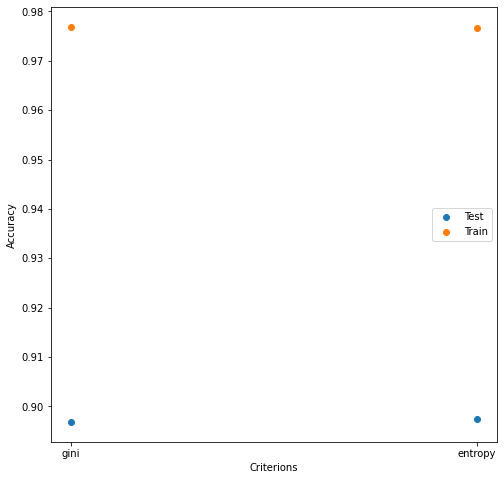

In [81]:
criterions = ['gini', 'entropy']

Train_Error_RandomForest = np.zeros(shape=(len(criterions),1))
Test_Error_RandomForest = np.zeros(shape=(len(criterions),1))
    
count = -1
for criterion in criterions:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(n_estimators = 18,
                                          criterion = criterion, 
                                          class_weight = 'balanced')
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(criterions, Test_Error_RandomForest, label='Test')
plt.scatter(criterions, Train_Error_RandomForest, label='Train')
plt.xlabel('Criterions')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best criterion = 'gini'
                        Because there's a very slight drop in the accuracy when entropy is used.

###### Elbow-Method for max_depth

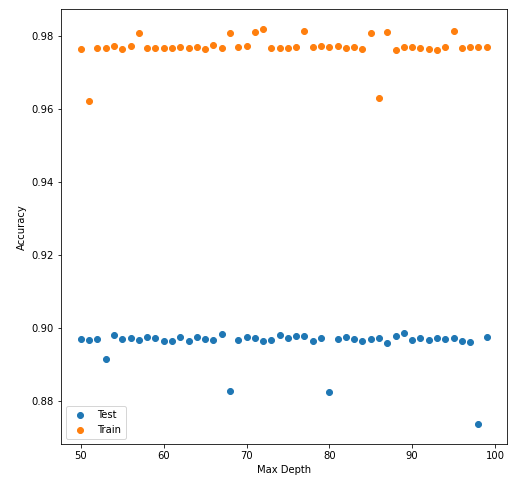

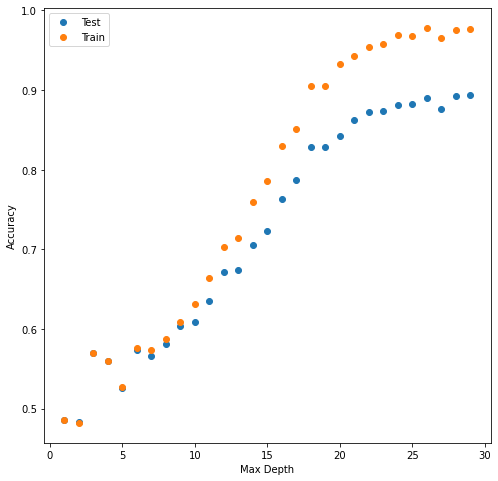

In [82]:
maxdepth = list(range(1,30))

Train_Error_RandomForest = np.zeros(shape=(len(maxdepth),1))
Test_Error_RandomForest = np.zeros(shape=(len(maxdepth),1))
    
count = -1
for max_depth in maxdepth:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(n_estimators = 18, 
                                          criterion = 'gini', 
                                          max_depth = max_depth, 
                                          class_weight = 'balanced')
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(maxdepth, Test_Error_RandomForest, label='Test')
plt.scatter(maxdepth, Train_Error_RandomForest, label='Train')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best Max Depth = '9'
                            Because after depth, the accuracy decreases then increases till it plataeus, 
                        but any depth after the drop would have high varience thus be an overfitted tree.

###### Elbow-Method for min_samples_split

This indicates the larger view of the min sample split, where we can see the accuracy decreases after a certain point.

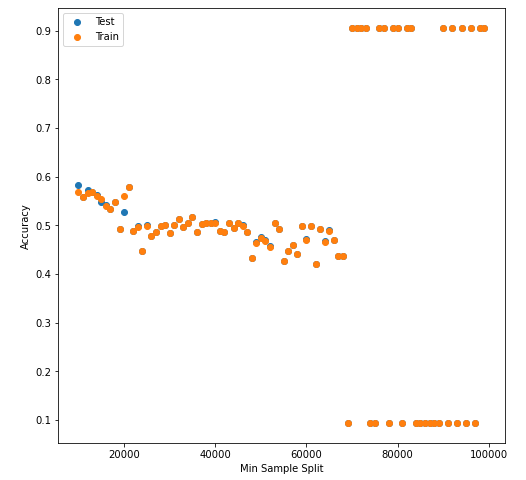

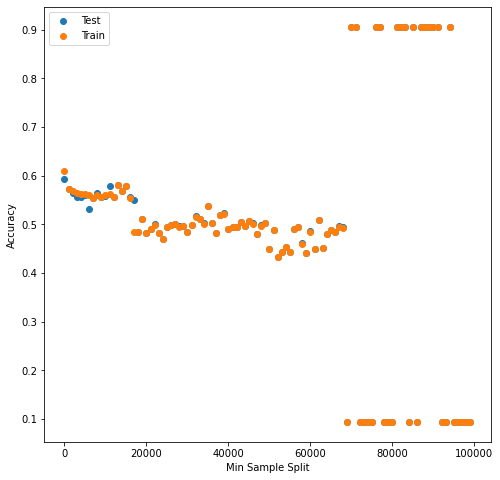

In [83]:
minsamplesplit = list(range(2,100000,1000))

Train_Error_RandomForest = np.zeros(shape=(len(minsamplesplit),1))
Test_Error_RandomForest = np.zeros(shape=(len(minsamplesplit),1))
    
count = -1
for mss in minsamplesplit:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(n_estimators = 18, 
                                          criterion = 'gini', 
                                          max_depth = 9,
                                          min_samples_split = mss,
                                          class_weight = 'balanced')
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(minsamplesplit, Test_Error_RandomForest, label='Test')
plt.scatter(minsamplesplit, Train_Error_RandomForest, label='Train')
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best Min Sample split = '2'
                        Since there is no increase in accuracy, rather a decrease after the initial value,
                        then a sudden increase, indicating overfitting. Thus there's no need to tune this parameter.

###### Elbow-Method for min_samples_leaf

The graphs below are different iterations of the min sample leaf to get the optimum value without overfitting.

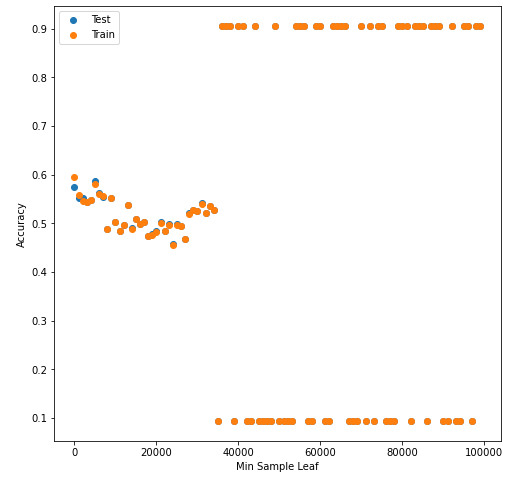

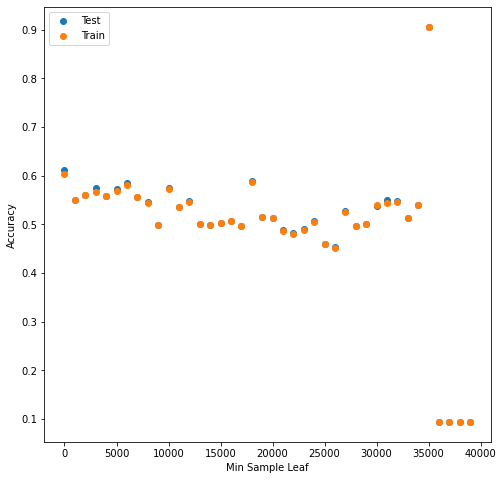

In [84]:
minsampleleaf = list(range(1,40000,1000))

Train_Error_RandomForest = np.zeros(shape=(len(minsampleleaf),1))
Test_Error_RandomForest = np.zeros(shape=(len(minsampleleaf),1))
    
count = -1
for msl in minsampleleaf:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(n_estimators = 18, 
                                          criterion = 'gini', 
                                          max_depth = 9,
                                          min_samples_split = 2,
                                          min_samples_leaf = msl,
                                          class_weight = 'balanced')
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(minsampleleaf, Test_Error_RandomForest, label='Test')
plt.scatter(minsampleleaf, Train_Error_RandomForest, label='Train')
plt.xlabel('Min Sample Leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best Min Sample leaf = '1'
                        Again, this parameter esentially doesn't require to be tuned as the accuracy decreases
                        after the initial value and after 34000, it starts to overfit.

###### Elbow-Method for ccp alpha

The graphs below indicate the streamlining of the best value/range for ccp_alpha.

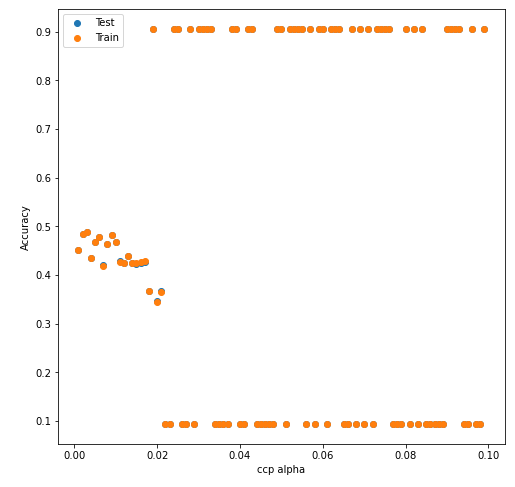

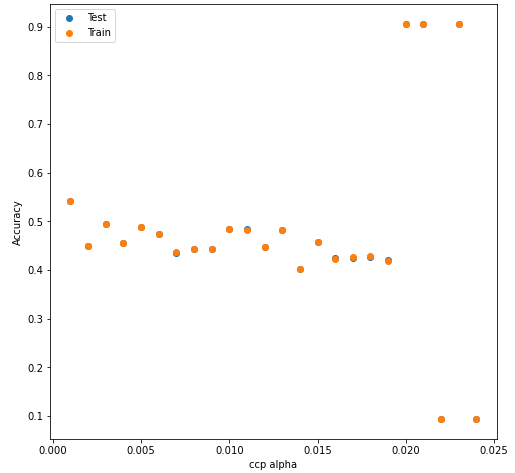

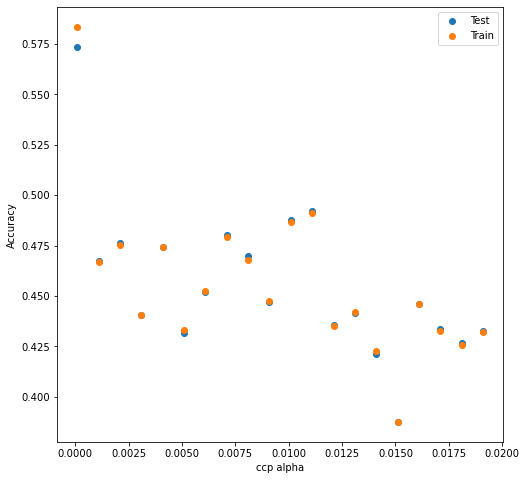

In [85]:
ccpalpha = np.arange(0.0001,0.02,0.001)

Train_Error_RandomForest = np.zeros(shape=(len(ccpalpha),1))
Test_Error_RandomForest = np.zeros(shape=(len(ccpalpha),1))
    
count = -1
for ccp in ccpalpha:
    count += 1
    # instantiate a tree classifier model, and fit with X and y
    RandomForest = RandomForestClassifier(n_estimators = 18, 
                                          criterion = 'gini', 
                                          max_depth = 9,
                                          min_samples_split = 2,
                                          min_samples_leaf = 1,
                                          class_weight = 'balanced',
                                          ccp_alpha = ccp)
    # Fit the model
    RandomForest.fit(X_train_monthly, y_train_monthly)
    Train_Error_RandomForest[count,0] = RandomForest.score(X_train_monthly, y_train_monthly)
    Test_Error_RandomForest[count,0]  = RandomForest.score(X_test_monthly, y_test_monthly)

plt.scatter(ccpalpha, Test_Error_RandomForest, label='Test')
plt.scatter(ccpalpha, Train_Error_RandomForest, label='Train')
plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Based on the graph above:

                        Best ccp alpha = '0.0001'
                        As the accuracy decreases, same as the case for max deph and min samples. 

In [86]:
# Define and fit
Random_Forest = RandomForestClassifier(n_estimators = 18, 
                                       criterion = 'gini', 
                                       max_depth = 9,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       class_weight = 'balanced',
                                       ccp_alpha = 0.0001)
Random_Forest = Random_Forest.fit(X_train_monthly, y_train_monthly)

### 5. Plot coefficient values or feature importance.

In [87]:
# Calculate feature importances
importances = Random_Forest.feature_importances_
importances

array([0.01493283, 0.002263  , 0.02810689, 0.02535609, 0.03075884,
       0.00507137, 0.00530717, 0.00367384, 0.09432517, 0.08940466,
       0.04433245, 0.0265698 , 0.01175395, 0.00407189, 0.17169108,
       0.16166916, 0.16240575, 0.02163168, 0.03492284, 0.00721893,
       0.00178917, 0.00237739, 0.0020482 , 0.00291502, 0.00180112,
       0.00154262, 0.00163275, 0.04042635])

In [88]:
importances.shape

(28,)

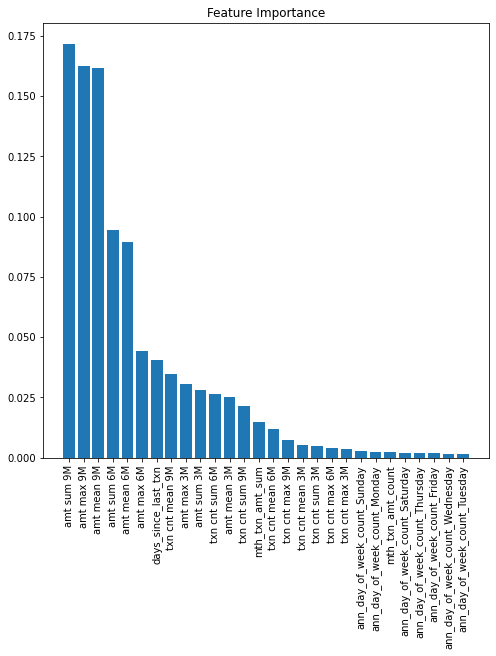

In [89]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [monthly_features_outputs.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
# Show plot
plt.show()

### 6. Plot probability distribution for test set.

Text(-9.075000000000003, 0.5, 'Counts of clients')

<Figure size 720x720 with 0 Axes>

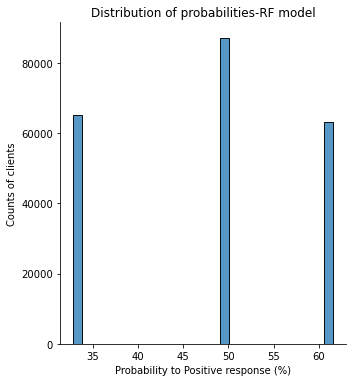

In [90]:
plt.figure(figsize=(10,10))
sns.displot(data = 100*scores_test)
plt.title('Distribution of probabilities-RF model')
plt.xlabel('Probability to Positive response (%)')
plt.ylabel('Counts of clients')

### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

### ROC Curve

In [91]:
# Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
scores_train = Random_Forest.predict_proba(X_train_monthly)[:,1] 
scores_test  = Random_Forest.predict_proba(X_test_monthly)[:,1] 

# Predict the class of test set
y_test_predicted2 = Random_Forest.predict(X_test_monthly)

# Calculate accuracy at every iteration and append
accuracy = 100*accuracy_score(y_test_monthly, y_test_predicted2, normalize = True)

# ROC Calc Train set 
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)

# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)

# Calculate the AUCs
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

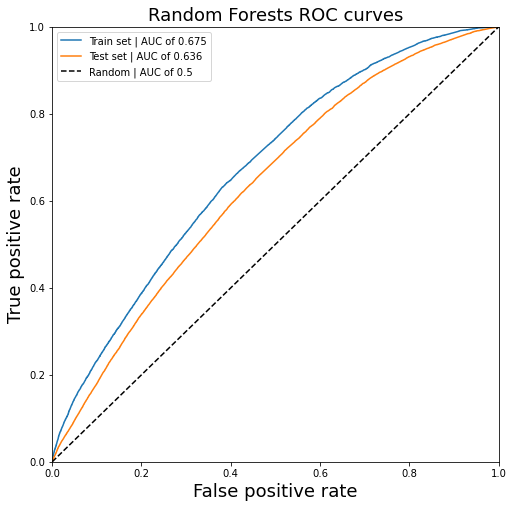

In [92]:
# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random Forests ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

### Confusion Matrix

In [93]:
cm2 = confusion_matrix(y_test_monthly, y_test_predicted2)
print(cm2)

[[115015  80382]
 [  8048  12254]]


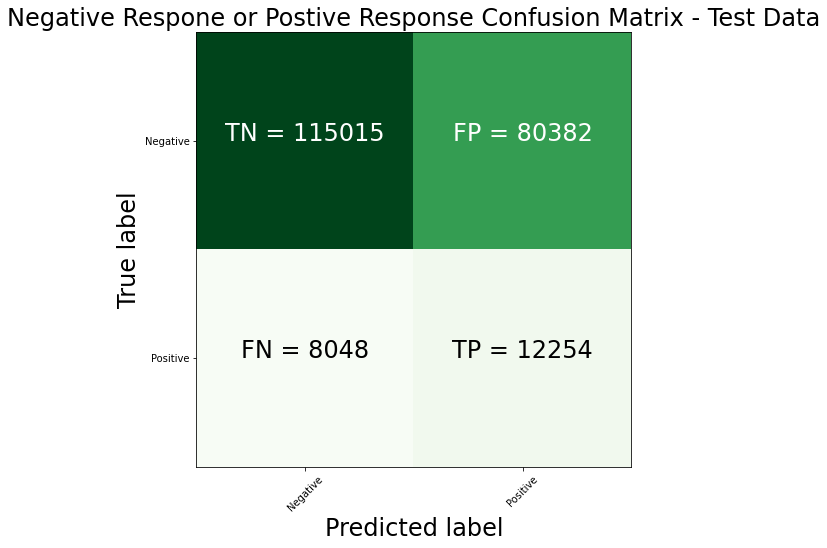

In [94]:
plt.clf()
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Greens)
classNames = ['Negative','Positive']
plt.title('Negative Respone or Postive Response Confusion Matrix - Test Data', fontsize = 24)
plt.ylabel('True label', fontsize = 24)
plt.xlabel('Predicted label', fontsize = 24)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm2.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]), fontsize = 24,
                 horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh else "black")
plt.show()

#### Classification Report

In [95]:
print(classification_report(y_test_monthly, y_test_predicted2, target_names = ['Positive Response', 'Negative Response']))

                   precision    recall  f1-score   support

Positive Response       0.93      0.59      0.72    195397
Negative Response       0.13      0.60      0.22     20302

         accuracy                           0.59    215699
        macro avg       0.53      0.60      0.47    215699
     weighted avg       0.86      0.59      0.67    215699



#### Accuracy Score

In [96]:
# Change normalize = True/False as well. DIAGONAL OVER ALL
accuracy_score(y_test_monthly, y_test_predicted2, normalize = True)

0.5900305518338055

### 8. Plot decision boundary for top 2 features

In [97]:
xx, yy = np.mgrid[-2:8:1.1111, -2:8:1.1111] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 10x10

# np.ones is a table full of ones with 100x75 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((100, 28)) * np.median(X_train_monthly, axis=0) 
pd.DataFrame(median_inputs) # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

# Then, we replace the 5th and 11th column with the values of the grid
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:12,:34] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 14)|(x.name == 15)  else '' for i in x])


(100, 2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,-2.000000,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
1,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,-0.888900,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
2,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,0.222200,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
3,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,1.333300,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
4,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,2.444400,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
5,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,3.555500,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
6,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,4.666600,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
7,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,5.777700,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
8,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,6.888800,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
9,0.000000,0.000000,66.000000,22.000000,58.845348,1.000000,0.333333,1.000000,152.000000,25.333333,86.887242,2.000000,0.333333,1.000000,-2.000000,7.999900,102.864562,3.542333,0.393593,1.462211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000


In [98]:
probs = Random_Forest.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[None,
 (-2.0, 8.0),
 (-2.0, 8.0),
 Text(0.5, 0, 'amt mean 9M'),
 Text(0, 0.5, 'amt sum 9M')]

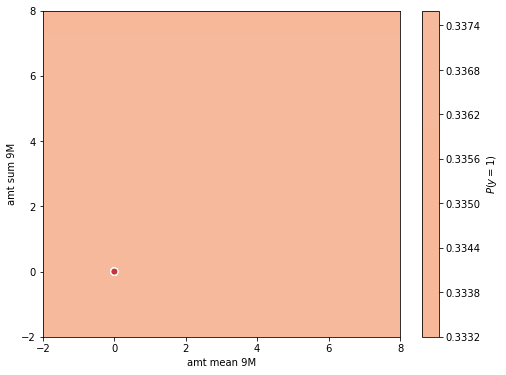

In [99]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly['amt mean 9M'][50:], X_train_monthly['amt sum 9M'][50:], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
# plt.annotate('P = 45.0%', xy=(5,0), xycoords='data',horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
# plt.annotate('P = 12.8%', xy=(-0.8,0.35), xycoords='data', horizontalalignment= 'center', fontsize = 14)
# plt.annotate('P = 27.2%', xy=(-0.8,6.0), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
# plt.annotate('P = 55.1%', xy=(6.0,3.0), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)
# plt.annotate('P = 27.2%', xy=(7.0,4.5), xycoords='data', horizontalalignment= 'center', verticalalignment= 'center', fontsize = 14)

ax.set(aspect="auto",
       xlim=(-2, 8), ylim=(-2, 8),
       xlabel="amt mean 9M", ylabel="amt sum 9M")

## 1.3 Comparison of methods (10 points)


##### Comparision in the Annual Model File.